<a href="https://colab.research.google.com/github/srilav/neuralnetwork/blob/main/option_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install nsetools

In [136]:
import requests
import time
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
from nsetools import Nse 

In [141]:
import datetime

e = datetime.datetime.now()
print ("Current date and time = %s" % e)

print ("Today's date:  = %s/%s/%s" % (e.day, e.month, e.year))

print ("The time is now: = %s:%s:%s" % (e.hour, e.minute, e.second))


Current date and time = 2021-12-29 14:06:25.744995
Today's date:  = 29/12/2021
The time is now: = 14:6:25


In [130]:
from requests.models import Response
              # will publish if session established oo not 
#####*********Establishing Seesion with NSE website *************
url_oc = "https://www.nseindia.com/option-chain"
url = f"https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY"
expiry_dt = '20-Dec-2021'              #Select Expiry as you data require
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, '
                         'like Gecko) '
                         'Chrome/80.0.3987.149 Safari/537.36',
           'accept-language': 'en,gu;q=0.9,hi;q=0.8', 'accept-encoding': 'gzip, deflate, br'}
session = requests.Session()
response = session.get(url_oc, headers=headers, timeout=5)
cookies = dict(response.cookies)
print(response)   

<Response [200]>


In [131]:
resp = session.get(url, headers=headers, timeout=15, cookies=cookies)
resp = resp.json()


In [24]:
resp['records']['data']

[{'PE': {'askPrice': 0.95,
   'askQty': 1475,
   'bidQty': 1375,
   'bidprice': 0.9,
   'change': -0.04999999999999993,
   'changeinOpenInterest': 4008,
   'expiryDate': '30-Dec-2021',
   'identifier': 'OPTIDXBANKNIFTY30-12-2021PE24000.00',
   'impliedVolatility': 234.87,
   'lastPrice': 0.9,
   'openInterest': 7395,
   'pChange': -5.263157894736835,
   'pchangeinOpenInterest': 118.3348095659876,
   'strikePrice': 24000,
   'totalBuyQuantity': 164325,
   'totalSellQuantity': 30750,
   'totalTradedVolume': 11028,
   'underlying': 'BANKNIFTY',
   'underlyingValue': 35138.85},
  'expiryDate': '30-Dec-2021',
  'strikePrice': 24000},
 {'CE': {'askPrice': 8186.1,
   'askQty': 50,
   'bidQty': 125,
   'bidprice': 8166.2,
   'change': 462.64999999999964,
   'changeinOpenInterest': 0,
   'expiryDate': '30-Dec-2021',
   'identifier': 'OPTIDXBANKNIFTY30-12-2021CE27000.00',
   'impliedVolatility': 0,
   'lastPrice': 8182.65,
   'openInterest': 20,
   'pChange': 5.99287564766839,
   'pchangeinOpenI

In [132]:
ce_values = [data['CE'] for data in resp['records']['data'] if "CE" in data and data['expiryDate'] == '30-Dec-2021'] #Seperating All CE information from JsonData
pe_values = [data['PE'] for data in resp['records']['data'] if "PE" in data and data['expiryDate'] == '30-Dec-2021'] #Seperating All PE information from JsonData
pe_values



[{'askPrice': 0.4,
  'askQty': 750,
  'bidQty': 950,
  'bidprice': 0.3,
  'change': 0.10000000000000003,
  'changeinOpenInterest': 99,
  'expiryDate': '30-Dec-2021',
  'identifier': 'OPTIDXNIFTY30-12-2021PE8000.00',
  'impliedVolatility': 448.75,
  'lastPrice': 0.4,
  'openInterest': 2222,
  'pChange': 33.33333333333335,
  'pchangeinOpenInterest': 4.66321243523316,
  'strikePrice': 8000,
  'totalBuyQuantity': 14200,
  'totalSellQuantity': 28200,
  'totalTradedVolume': 614,
  'underlying': 'NIFTY',
  'underlyingValue': 17213.6},
 {'askPrice': 0.3,
  'askQty': 50,
  'bidQty': 3700,
  'bidprice': 0.25,
  'change': -0.15000000000000002,
  'changeinOpenInterest': -12,
  'expiryDate': '30-Dec-2021',
  'identifier': 'OPTIDXNIFTY30-12-2021PE8500.00',
  'impliedVolatility': 400.75,
  'lastPrice': 0.25,
  'openInterest': 280.5,
  'pChange': -37.50000000000001,
  'pchangeinOpenInterest': -4.102564102564102,
  'strikePrice': 8500,
  'totalBuyQuantity': 5200,
  'totalSellQuantity': 4300,
  'totalTr

In [33]:
data = resp['records']['data']
if "CE" in data and data['expiryDate'] == expiry_dt:
  ce_values = data['CE']

In [105]:
data = resp['records']['data']
data_dt = pd.DataFrame(data)
column_B = data_dt.iloc[:, 2].tolist()
ce_values = list(column_B)
ce = list(ce_values)
ce


[{'askPrice': 0.95,
  'askQty': 1475,
  'bidQty': 1375,
  'bidprice': 0.9,
  'change': -0.04999999999999993,
  'changeinOpenInterest': 4008,
  'expiryDate': '30-Dec-2021',
  'identifier': 'OPTIDXBANKNIFTY30-12-2021PE24000.00',
  'impliedVolatility': 234.87,
  'lastPrice': 0.9,
  'openInterest': 7395,
  'pChange': -5.263157894736835,
  'pchangeinOpenInterest': 118.3348095659876,
  'strikePrice': 24000,
  'totalBuyQuantity': 164325,
  'totalSellQuantity': 30750,
  'totalTradedVolume': 11028,
  'underlying': 'BANKNIFTY',
  'underlyingValue': 35138.85},
 {'askPrice': 1.2,
  'askQty': 575,
  'bidQty': 1200,
  'bidprice': 1.15,
  'change': 0.19999999999999996,
  'changeinOpenInterest': 14727,
  'expiryDate': '30-Dec-2021',
  'identifier': 'OPTIDXBANKNIFTY30-12-2021PE27000.00',
  'impliedVolatility': 169.73,
  'lastPrice': 1.2,
  'openInterest': 29576,
  'pChange': 19.999999999999996,
  'pchangeinOpenInterest': 99.1783958515725,
  'strikePrice': 27000,
  'totalBuyQuantity': 468075,
  'totalSe

In [79]:
columns = list(pe_values)
my_list = list(columns)
my_list

[{'askPrice': 0.95,
  'askQty': 1475,
  'bidQty': 1375,
  'bidprice': 0.9,
  'change': -0.04999999999999993,
  'changeinOpenInterest': 4008,
  'expiryDate': '30-Dec-2021',
  'identifier': 'OPTIDXBANKNIFTY30-12-2021PE24000.00',
  'impliedVolatility': 234.87,
  'lastPrice': 0.9,
  'openInterest': 7395,
  'pChange': -5.263157894736835,
  'pchangeinOpenInterest': 118.3348095659876,
  'strikePrice': 24000,
  'totalBuyQuantity': 164325,
  'totalSellQuantity': 30750,
  'totalTradedVolume': 11028,
  'underlying': 'BANKNIFTY',
  'underlyingValue': 35138.85},
 {'askPrice': 1.2,
  'askQty': 575,
  'bidQty': 1200,
  'bidprice': 1.15,
  'change': 0.19999999999999996,
  'changeinOpenInterest': 14727,
  'expiryDate': '30-Dec-2021',
  'identifier': 'OPTIDXBANKNIFTY30-12-2021PE27000.00',
  'impliedVolatility': 169.73,
  'lastPrice': 1.2,
  'openInterest': 29576,
  'pChange': 19.999999999999996,
  'pchangeinOpenInterest': 99.1783958515725,
  'strikePrice': 27000,
  'totalBuyQuantity': 468075,
  'totalSe

In [62]:
data = resp['records']['data']
if "PE" in data and data['expiryDate'] == expiry_dt:
  pe_values = data['PE']

In [133]:
ce_dt = pd.DataFrame(ce_values).sort_values(['openInterest'],ascending=False)
pe_dt = pd.DataFrame(pe_values).sort_values(['openInterest'],ascending=False)
       #***********Collecting All StrikePrice from Option Chain*********
       #StrikePriceDF=pd.DataFrame(ce_values)
       #StrikePriceList=StrikePriceDF['strikePrice'].values.tolist()
       #print(StrikePriceList)
       


---------------------------------------
|*******printing OI CALL data***********|
---------------------------------------

    strikePrice  lastPrice  openInterest  changeinOpenInterest
65        17500       1.70      175481.5               39676.5
61        17300      14.80      158099.0               60251.0
75        18000       0.75      126689.0              -18936.5
59        17200      52.00      112832.0               19912.0
63        17400       3.25      110443.0               35450.0
67        17600       1.45      109308.0               26393.0
69        17700       1.15       83851.0               30627.0
55        17000     207.00       73457.0               -4358.0
60        17250      29.85       58865.0               22464.0
71        17800       1.00       54765.0              -12786.0

---------------------------------------
|*******printing OI PUT data***********|
---------------------------------------

    strikePrice  lastPrice  openInterest  changeinOpenIntere

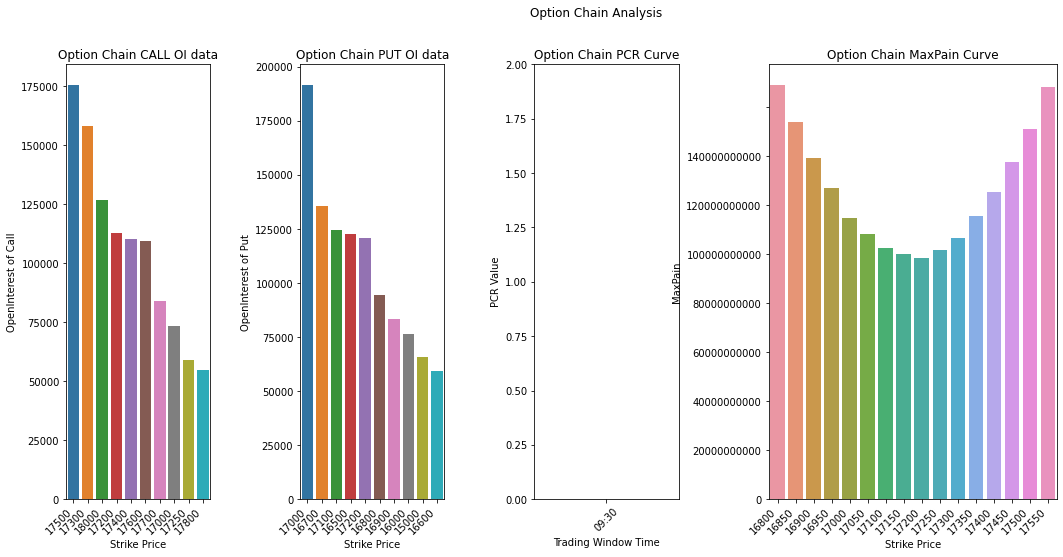

In [134]:
import time
PCR = []
TIME= []
maxPain=[]
StrikePriceList=[]
ce_dt[['strikePrice','lastPrice','openInterest', 'changeinOpenInterest']]
Final_CE_Data=ce_dt[['strikePrice','lastPrice','openInterest', 'changeinOpenInterest']].iloc[:10]
print("\n---------------------------------------")
print("|*******printing OI CALL data***********|")
print("---------------------------------------\n")
print(Final_CE_Data)
   
pe_dt[['strikePrice','lastPrice','openInterest', 'changeinOpenInterest']]
Final_PE_Data=pe_dt[['strikePrice','lastPrice','openInterest', 'changeinOpenInterest']].iloc[:10]
   
print("\n---------------------------------------")
print("|*******printing OI PUT data***********|")
print("---------------------------------------\n")
print(Final_PE_Data)
       
PCR_DataFrame,i=OI_PCR(ce_dt,pe_dt,TIME,PCR)    #Calling to PCR calculation Fuction 
       
print(PCR_DataFrame)
      
##----------------------------Max Pain Calculation----------------###
ce_dt_MaxPain = pd.DataFrame(ce_values)
pe_dt_MaxPain = pd.DataFrame(pe_values)
MaxPain_Df=MaxPain(ce_dt_MaxPain,pe_dt_MaxPain,LTP)
print(MaxPain_Df)
     
##----------------------------Chart Preparation For All Function ----------------##
OI_Charts(Final_CE_Data,Final_PE_Data,PCR_DataFrame,MaxPain_Df)

In [70]:
data = resp['records']['data']
my_list = data.columns.values.tolist()
# if "CE" in data and data['expiryDate'] == expiry_dt:
#   ce_values = data
#   print("entered")
# ce_values

AttributeError: ignored

In [65]:
ce_dt =  pd.DataFrame(ce_values)
ce_dt

""


In [61]:
# ce_dt = pd.DataFrame(ce_values).sort_values(by=['openInterest'],axis=1, ascending=False)
# pe_dt = pd.DataFrame(pe_values).sort_values(by=['openInterest'], axis=1, ascending=False)
ce_dt=  pd.DataFrame(ce_values)
ce_dt.shape

(0, 0)

In [76]:
response1 = session.get(url, headers=headers, timeout=15, cookies=cookies)
response1 = response1.json()
       
nse=Nse()
BankNiftyData = nse.get_index_quote("nifty bank")
LTP=BankNiftyData.get('lastPrice')
       
ce_values = [for data in response1['records']['data'] if data['expiryDate'] == expiry_dt] #Seperating All CE information from JsonData
pe_values = [data['PE'] for data in response1['records']['data'] if "PE" in data and data['expiryDate'] == expiry_dt] #Seperating All PE information from JsonData
ce_values

JSONDecodeError: ignored

In [118]:
def fetch_oi(expiry_dt):
   #**********Some Abbrivation*********
   #____PCR=PutCallRatio
   #____LTP=LastTradePrice
   #____Df=Dataframe
   #____TCVSP=TotalCashValue of Strike Price
   #****Creating empthy List to store the all these required data 
   PCR = []
   TIME= []
   maxPain=[]
   StrikePriceList=[]
   
   while True:                              #Program will run continously
       r = session.get(url, headers=headers, timeout=15, cookies=cookies)
       r = r.json()
       
       nse=Nse()
       BankNiftyData = nse.get_index_quote("nifty bank")
       LTP=BankNiftyData.get('lastPrice')
       
       ce_values = [data['CE'] for data in r['records']['data'] if "CE" in data and data['expiryDate'] == expiry_dt] #Seperating All CE information from JsonData
       pe_values = [data['PE'] for data in r['records']['data'] if "PE" in data and data['expiryDate'] == expiry_dt] #Seperating All PE information from JsonData

       ce_dt = pd.DataFrame(ce_values).sort_values(['openInterest'],ascending=False)
       pe_dt = pd.DataFrame(pe_values).sort_values(['openInterest'],ascending=False)
       #***********Collecting All StrikePrice from Option Chain*********
       #StrikePriceDF=pd.DataFrame(ce_values)
       #StrikePriceList=StrikePriceDF['strikePrice'].values.tolist()
       #print(StrikePriceList)
       
       ce_dt[['strikePrice','lastPrice','openInterest', 'changeinOpenInterest']]
       Final_CE_Data=ce_dt[['strikePrice','lastPrice','openInterest', 'changeinOpenInterest']].iloc[:10]
       print("\n---------------------------------------")
       print("|*******printing OI CALL data***********|")
       print("---------------------------------------\n")
       print(Final_CE_Data)
   
       pe_dt[['strikePrice','lastPrice','openInterest', 'changeinOpenInterest']]
       Final_PE_Data=pe_dt[['strikePrice','lastPrice','openInterest', 'changeinOpenInterest']].iloc[:10]
   
       print("\n---------------------------------------")
       print("|*******printing OI PUT data***********|")
       print("---------------------------------------\n")
       print(Final_PE_Data)
       
       PCR_DataFrame,i=OI_PCR(ce_dt,pe_dt,TIME,PCR)    #Calling to PCR calculation Fuction 
       
       #print(PCR_DataFrame)
      
##----------------------------Max Pain Calculation----------------###
       ce_dt_MaxPain = pd.DataFrame(ce_values)
       pe_dt_MaxPain = pd.DataFrame(pe_values)
       MaxPain_Df=MaxPain(ce_dt_MaxPain,pe_dt_MaxPain,LTP)
       print(MaxPain_Df)
     
##----------------------------Chart Preparation For All Function ----------------##
       OI_Charts(Final_CE_Data,Final_PE_Data,PCR_DataFrame,MaxPain_Df)
     


In [115]:
def MaxPain(ce_dt_MaxPain,pe_dt_MaxPain,LTP):
    print("\n Print MaxPain Dataframe for CE \n")
    MxPn_CE=ce_dt_MaxPain[['strikePrice','openInterest']]
    MxPn_PE=pe_dt_MaxPain[['strikePrice','openInterest']]
    MxPn_Df=pd.merge(MxPn_CE,MxPn_PE,on=['strikePrice'])   #Merge Two Dataframes on same coloum 'strikePrice'
    MxPn_Df.columns=['strikePrice','openInterest_call','openInterest_Put']
    print("Total number of StrikePrices in Option chain",len(MxPn_Df))
    
    StrikePriceList=MxPn_Df['strikePrice'].values.tolist()
    OiCallList=MxPn_Df['openInterest_call'].values.tolist()     
    OiPutList=MxPn_Df['openInterest_Put'].values.tolist()
    
    TCVSP=[]
##------------Will get TotalCashValuefor a StrikePrice ------------##
    for p in range(len(StrikePriceList)):
        #print("\n Itrinsic Value for strike \n\n",StrikePriceList[p])
        MxPn_Strike=StrikePriceList[p]
        TC=TotalOptionPainForStike(StrikePriceList,OiCallList,OiPutList,MxPn_Strike)
        #print("\nMaxPain for",MxPn_Strike," is :: ",TC)
        TC=int(TC)
        TCVSP.insert(p,TC)
        
    time.sleep(1)
    MaxPainDF=pd.DataFrame(list(zip(StrikePriceList,TCVSP)), columns = ["StrikePrice", "TotalMaxPain"])
    #print(MaxPainDF)
    MaxPainDF['StrikePrice']=pd.to_numeric(MaxPainDF['StrikePrice'])
    MaxPainDF['TotalMaxPain']=pd.to_numeric(MaxPainDF['TotalMaxPain'])
    minIDX=MaxPainDF['TotalMaxPain'].idxmin()   #Get the index of min pain
    print(minIDX)
    MinRange=minIDX-8
    MaxRange=minIDX+8
    print(MinRange,MaxRange)
    MaxPainChartDf=MaxPainDF[MinRange:MaxRange]
    MaxPainChartDf.index = range(len(MaxPainChartDf.index))
    return MaxPainChartDf

In [11]:
def TotalOptionPainForStike(StrikePriceList,OiCallList,OiPutList,MxPn_Strike) :
    #print("\nSTIRKEPriceLIst",StrikePriceList,"\nOICallList\n",OiCallList,"\nOIPutList\n",OiPutList,"\n",LTP)
    IntrinsicCall=[]
    IntrinsicPUT=[]
    OiCALLCash=[]
    OiPUTCash=[]
    CashValue=[]
 
 ##-------------Generating Intrinsic Value list for Call and Put for every Stike Price---------##   
    for k in range(len(StrikePriceList)):             
        #*********Calculating instinsicValue for Call OI Data*******
        Diff1=(int(round(MxPn_Strike-StrikePriceList[k],3)))    
        
        if Diff1<0:
            Diff1=0
            IntrinsicCall.insert(k,Diff1)
        else:
            IntrinsicCall.insert(k,Diff1)
    
    #*********Calculating instinsicValue for PUT OI Data*******
        Diff2=(int(round(StrikePriceList[k]-MxPn_Strike,3)))
        
        if Diff2<0:
            Diff2=0
            IntrinsicPUT.insert(k,Diff2)
        else:
            IntrinsicPUT.insert(k,Diff2)
        #print("\nIntrinSicValue for PUT for StrikePrice",MxPn_Strike,"\n\n",IntrinsicPUT,"\n\n")
    
##---------------Calculating CashValue for stike price using Call+Put intrinsic Values list------------##
    
    for q in range(len(StrikePriceList)):

        OiCALLCash.append(IntrinsicCall[q]*OiCallList[q])
        OiCALLCash.append(IntrinsicPUT[q]*OiPutList[q])
        
        #PP=round((sum(OiCALLCash)+sum(OiPUTCash)),0)
        #print(PP1," ___ ",PP2)
       
    TotalCashValue=round((sum(OiCALLCash)+sum(OiPUTCash)),0)
    
    return TotalCashValue 

In [116]:
def OI_PCR(ce_dt,pe_dt,TIME,PCR):
    global i
    global j
    Total_Call_OI=ce_dt['openInterest'].sum()
    print("Total_Call_OI==>",Total_Call_OI)
    Total_Put_OI=pe_dt['openInterest'].sum()
    print("Total_Put_OI==>",Total_Put_OI)
    PutCallRatio=round(Total_Put_OI/Total_Call_OI,2)
    print(PutCallRatio)
    print(i)

    PCR.insert(i,PutCallRatio)
    print(type(PCR))
    time=datetime.time(datetime.now()).replace(microsecond=0)
    time=str(time)
    print("Printing First captured time",time) 
    TIME.insert(i,time)
                        
    if len(PCR)==12:
        PCR.pop(0)
    print(PCR)

    if len(TIME)==12:
        TIME.pop(0)
    print(TIME)
    i=i+1
    
    PCR_df=pd.DataFrame(list(zip(TIME,PCR)), columns = ["TIME", "PCR"])
    PCR_df=PCR_df.drop_duplicates(subset=['PCR'], keep='first')
    PCR_df.PCR = PCR_df.PCR.astype(float)
    return PCR_df,i

In [117]:
##--------------Chart fuction ------------------##   
def OI_Charts(Final_CE_Data,Final_PE_Data,PCR_DataFrame,MaxPain_Df):
   plt.ion()
   fig, axes = plt.subplots(1, 4, figsize=(16, 8), sharey=False,gridspec_kw={'width_ratios': [1,1,1,2]})
   plt.subplots_adjust(wspace = 0.5,left=.04)
   fig.suptitle('Option Chain Analysis')
   
   axes[0].set_title('Option Chain CALL OI data')
   sns.barplot(ax=axes[0], x=Final_CE_Data.strikePrice, y=Final_CE_Data.openInterest,order=Final_CE_Data['strikePrice'])
   axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
   axes[0].set_xlabel('Strike Price')
   axes[0].set_ylabel('OpenInterest of Call')
   
   axes[1].set_title('Option Chain PUT OI data')
   sns.barplot(ax=axes[1], x=Final_PE_Data.strikePrice, y=Final_PE_Data.openInterest,order=Final_PE_Data['strikePrice'])
   axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
   axes[1].set_xlabel('Strike Price')
   axes[1].set_ylabel('OpenInterest of Put')

   
   axes[2].set_title('Option Chain PCR Curve')
   sns.lineplot(ax=axes[2],x=PCR_DataFrame["TIME"], y=PCR_DataFrame["PCR"])
   axes[2].set_xticklabels(['09:30','10:00','10:30','11:00','11:30','12:00','12:30','1:00','1:30','2:00','2:30','3:00'],rotation=45)
   axes[2].set(ylim=(0,2))
   axes[2].set_xlabel('Trading Window Time')
   axes[2].set_ylabel('PCR Value')
   
   axes[3].set_title('Option Chain MaxPain Curve')
   sns.barplot(ax=axes[3],x="StrikePrice", y="TotalMaxPain",data=MaxPain_Df,order=MaxPain_Df['StrikePrice'])
   axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, horizontalalignment='right')
   axes[3].set_yticklabels(['0','20000000000','40000000000','60000000000','80000000000','100000000000','120000000000','140000000000'])
   axes[3].set_xlabel('Strike Price')
   axes[3].set_ylabel('MaxPain')
     
   plt.pause(30)
   plt.close()

In [16]:
def main():
    global i,j ,count
    i=1
    j=2
    count=0
    expiry_dt = '20-Dec-2021'              #Select Expiry as you data require
    fetch_oi(expiry_dt)

In [17]:
###############___MainProgram_StartPoint______#######
if __name__ == '__main__':
    main()

KeyError: ignored